In [66]:
import duckdb

In [67]:
cursor=duckdb.connect()
data=duckdb.read_csv('train.csv')

In [68]:
duckdb.query(f'select * from data limit 5')

┌───────┬────────────┬───────────┬──────────────┬───┬────────┬────────┬───────────┬────────────────┬───────────┐
│  Id   │ MSSubClass │ MSZoning  │ LotFrontage  │ … │ MoSold │ YrSold │ SaleType  │ SaleCondition  │ SalePrice │
│ int64 │   int64    │  varchar  │   varchar    │   │ int64  │ int64  │  varchar  │    varchar     │   int64   │
├───────┼────────────┼───────────┼──────────────┼───┼────────┼────────┼───────────┼────────────────┼───────────┤
│     1 │         60 │ RL        │ 65           │ … │      2 │   2008 │ WD        │ Normal         │    208500 │
│     2 │         20 │ RL        │ 80           │ … │      5 │   2007 │ WD        │ Normal         │    181500 │
│     3 │         60 │ RL        │ 68           │ … │      9 │   2008 │ WD        │ Normal         │    223500 │
│     4 │         70 │ RL        │ 60           │ … │      2 │   2006 │ WD        │ Abnorml        │    140000 │
│     5 │         60 │ RL        │ 84           │ … │     12 │   2008 │ WD        │ Normal      

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
duckdb.query(f'select lOG(SalePrice) from data').df()

,log(SalePrice)
0,5.319106
1,5.258877
2,5.349278
3,5.146128
4,5.397940
...,...
1455,5.243038
1456,5.322219
1457,5.425697
1458,5.152670


<Axes: xlabel='log_sale_price', ylabel='Density'>

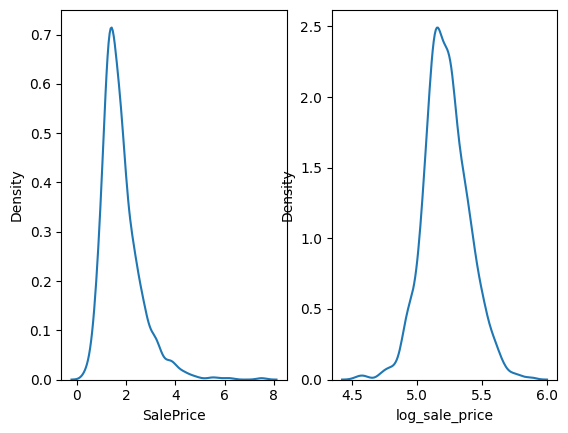

In [71]:
fig,ax=plt.subplots(1,2)
sns.kdeplot(ax=ax[0],data=duckdb.query(f'select (SalePrice/(100000)) as SalePrice from data').df(),x='SalePrice')
sns.kdeplot(ax=ax[1],data=duckdb.query(f'select LOG(SalePrice) AS log_sale_price from data').df(),x='log_sale_price')

In [72]:
duckdb.query('SELECT SALEPRICE FROM data').df()['SalePrice'].values

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([4.54282543, 4.54791002, 4.57863921, ..., 5.79588002, 5.87215627,
         5.87794695])),
 (0.17296308919394993, 5.221978956475628, 0.9953761475636612))

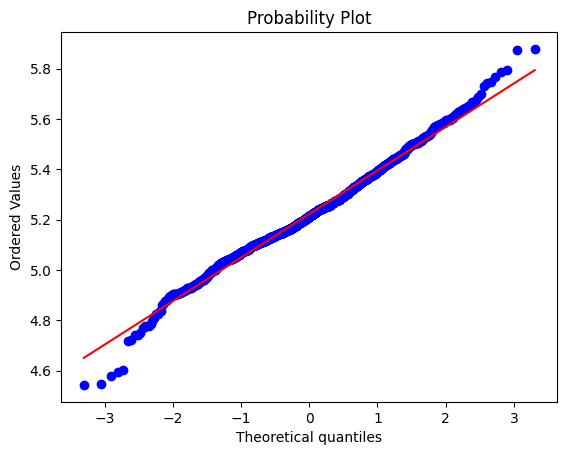

In [73]:
import statsmodels.api as sm
import scipy as sc
sc.stats.probplot(x=duckdb.query('SELECT LOG(SALEPRICE) FROM data').df()['log(SALEPRICE)'].values,plot=plt)

## T-Test: One Sample| Two tailed| Mean

In [74]:
import pandas as pd

In [75]:
def result(p):
    if p['p_value']<0.05:
        p['hypothesis_accepted']='Alternative'
    else:
        p['hypothesis_accepted']='Null'
    temp=pd.DataFrame(p,index=[''])
    return temp

In [76]:
import numpy as np

In [77]:
data_df=data.df()
data_df['log_SalePrice']=np.log1p(data_df['SalePrice'])

In [78]:
sample=data_df.sample(25)
p={}

In [79]:
budget_Price=np.log1p(120000)

In [80]:
p['value1'],p['value2']=sample['log_SalePrice'].mean(),budget_Price
p['score'],p['p_value']=sc.stats.ttest_1samp(popmean=budget_Price,a=sample['log_SalePrice'])

In [81]:
p['p_value']
result(p)

,value1,value2,score,p_value,hypothesis_accepted
,12.050406,11.695255,4.897607,0.000054,Alternative


## T-Test: One Sample| one tailed| Mean

In [82]:
p['value1'],p['value2']=sample['log_SalePrice'].mean(),budget_Price
p['score'],p['p_value']=sc.stats.ttest_1samp(popmean=budget_Price,a=sample['log_SalePrice'],alternative='greater')
result(p)

,value1,value2,score,p_value,hypothesis_accepted
,12.050406,11.695255,4.897607,0.000027,Alternative


## T-Test: Two Sample| Two tailed| Mean

In [83]:
data_df.shape

(1460, 82)

In [84]:
data_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [85]:
small_house=data_df.sort_values('GrLivArea').iloc[:730]
large_house=data_df.sort_values('GrLivArea').iloc[730:]

In [86]:
small_house_25=small_house.sample(25)
large_house_25=large_house.sample(25)

In [87]:
p['value1']=small_house_25['log_SalePrice'].mean()
p['value2']=large_house_25['log_SalePrice'].mean()
p['score'],p['p_value']=sc.stats.ttest_ind(small_house_25['log_SalePrice'],large_house_25['log_SalePrice'])
result(p)

,value1,value2,score,p_value,hypothesis_accepted
,11.821751,12.189734,-3.540798,0.000899,Alternative


## T-test: Two sample|One tailed|Mean

In [88]:
p['value1']=small_house_25['log_SalePrice'].mean()
p['value2']=large_house_25['log_SalePrice'].mean()
p['score'],p['p_value']=sc.stats.ttest_ind(small_house_25['log_SalePrice'],large_house_25['log_SalePrice'],alternative='less')
result(p)

,value1,value2,score,p_value,hypothesis_accepted
,11.821751,12.189734,-3.540798,0.000449,Alternative


# Z-test

In [89]:
small_house_100=small_house.sample(n=100,random_state=1)
large_house_100=large_house.sample(n=100,random_state=1)

## One Sample| One tailed| Mean

In [90]:
from statsmodels.stats.weightstats import *

Null: small house have price 120000 <br>
alternative: small house have price < 120000

In [91]:
p['value1'],p['value2']=small_house_100['log_SalePrice'].mean(),budget_Price
p['score'],p['p_value']=ztest(small_house_100['log_SalePrice'],value=budget_Price,alternative='larger')
result(p)

,value1,value2,score,p_value,hypothesis_accepted
,11.785785,11.695255,3.592878,0.000164,Alternative


## One sample| One tailed| Proportion

Null Hypo: The small house under 120000 < =25% <br>
Alternative: The Small house under 120000 > 25%

In [62]:
from statsmodels.stats.proportion import *

In [38]:
p={}
p['value1']=len(small_house_100.loc[small_house_100['log_SalePrice']<budget_Price])
p['value2']=len(small_house_100)
p['score'],p['p_value']=proportions_ztest(p['value1'],p['value2'],value=0.25,alternative='larger')
result(p)

,value1,value2,score,p_value,hypothesis_accepted
,32,100,1.500613,0.066728,Null


## Two Sample| One tailed| proportions

Null: (proportion of small house which are > 120000 ) >=  (proportion of large house which are > 120000 ) <br>
Alter: (proportion of small house which are > 120000 ) <  (proportion of large house which are > 120000 )

In [94]:
A1=len(small_house_100.loc[small_house_100['log_SalePrice']>budget_Price])
B1=len(small_house_100)
A2=len(large_house_100.loc[large_house_100['log_SalePrice']>budget_Price])
B2=len(large_house_100)

p['value1'],p['value2']=A1/B1,A2/B2
p['score'],p['p_value']=proportions_ztest([A1,A2],[B1,B2],alternative='smaller')
result(p)

,value1,value2,score,p_value,hypothesis_accepted
,0.67,0.95,-5.046889,2.245314e-07,Alternative


## Two Sample| One tailed| Mean

Null: SalePrice of small house >= SalePrice of larger house <br>
Alter: SalePrice of small house < SalePrice of larger house

In [96]:
p['value1'],p['value2']=small_house_100['log_SalePrice'].mean(),large_house_100['log_SalePrice'].mean()
p['score'],p['p_value']=ztest(small_house_100['log_SalePrice'],large_house_100['log_SalePrice'],alternative='smaller')
result(p)

,value1,value2,score,p_value,hypothesis_accepted
,11.785785,12.248987,-10.771677,2.341946e-27,Alternative


# F-test(ANOVA)

In [99]:
small_house_100.groupby('MSZoning')['log_SalePrice'].mean()

MSZoning
C (all)      11.589896
FV           12.030397
RH           11.705055
RL           11.827878
RM           11.617358
Name: log_SalePrice, dtype: float64

Is there a significant difference in price based on zoning.

Null: There is no difference between log_SalePrice

Alter: There is difference

In [122]:
sh=small_house_100.copy()
def samples(a):
    cat=list(set(sh.MSZoning))[a]
    return sh.loc[sh.MSZoning==cat,'log_SalePrice']

In [126]:
p['score'],p['p_value']=stats.f_oneway(samples(0),samples(1),samples(2),samples(3),samples(4))
result(p).iloc[:,2:]

,score,p_value,hypothesis_accepted
,4.145815,0.003866,Alternative


## Chi square Test

In [127]:
data_df.shape

(1460, 82)

In [128]:
730/4

182.5

In [138]:
set(small_house.GarageType)

{'2Types     ',
 'Attchd     ',
 'Basment    ',
 'BuiltIn    ',
 'CarPort    ',
 'Detchd     ',
 'NA         '}

In [140]:
small_house.loc[small_house.GarageType=='NA         ','GarageType']='No Garage'

In [141]:
small_house.GarageType.value_counts()

GarageType
Attchd         368
Detchd         268
No Garage       64
BuiltIn         12
Basment         10
CarPort          7
2Types           1
Name: count, dtype: int64

In [147]:
small_house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [154]:
sample1=small_house.sort_values('GrLivArea')[:182].sample(100)
sample2=small_house.sort_values('GrLivArea')[182+1:(182+182)].sample(100)
sample3=small_house.sort_values('GrLivArea')[(182+182+1):(182+182+182+1)].sample(100)
sample4=small_house.sort_values('GrLivArea')[(182+182+182+1):730].sample(100)
dff=pd.concat(
    [
    sample1.GarageType.value_counts().to_frame(),
    sample2.GarageType.value_counts().to_frame(),
    sample3.GarageType.value_counts().to_frame(),
    sample4.GarageType.value_counts().to_frame()
],axis=1,sort=False)
dff.columns=['sample1','sample2','sample3','sample4']
dff=dff[:3]

In [160]:
p['score'],p['p_value']=stats.chi2_contingency(dff)[:2]
result(p)[['score','p_value','hypothesis_accepted']]

,score,p_value,hypothesis_accepted
,40.384878,3.826775e-07,Alternative
